<a href="https://colab.research.google.com/github/Chhaya-cloud/Chatbot/blob/main/Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Importing the data
df = pd.read_csv('/content/sample_data/pima-indians-diabetes.csv', names = ['pregnancies', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age','label'])
df.head()

,pregnancies,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Separating the input and output data
X = df.drop('label', axis = 1)
y = df['label']

In [9]:
# performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [10]:
# Creating a randomforest classifier
clf = RandomForestClassifier(n_estimators=100)

# Fitting the data
clf.fit(X_train, y_train)


RandomForestClassifier()

In [12]:
# taking the predictions from the model
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

In [13]:
# MOdel Evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy Score on Train Data: ', np.round(accuracy_score(y_train, y_train_pred),2 ))
print(' Training Precision:', np.round(precision_score(y_train, y_train_pred),2))
print(' Training Recall:', np.round(recall_score(y_train, y_train_pred),2))
print(' Training F1 Score:', np.round(f1_score(y_train, y_train_pred),2))
print('Accuracy Score on Test Data: ', np.round(accuracy_score(y_train, y_train_pred),2 ))
print(' Testing Precision:', np.round(precision_score(y_train, y_train_pred),2))
print(' Testing Recall:', np.round(recall_score(y_train, y_train_pred),2))
print(' Testing F1 Score:', np.round(f1_score(y_train, y_train_pred),2))

Accuracy Score on Train Data:  1.0
 Training Precision: 1.0
 Training Recall: 1.0
 Training F1 Score: 1.0
Accuracy Score on Test Data:  1.0
 Testing Precision: 1.0
 Testing Recall: 1.0
 Testing F1 Score: 1.0


In [ ]:
'''
Comment - the above model is overfitted
Perform hyper parameter optimization
using GrideSearchCV and RandomizedSearchCV
'''

<Axes: xlabel='Predicted', ylabel='Actual'>

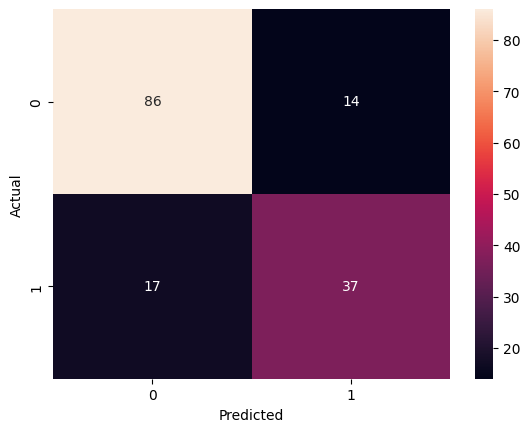

In [14]:
# Confusion Matrix
data = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(data, annot=True)



In [15]:
# Generating the  classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       100
           1       0.73      0.69      0.70        54

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.80      0.80       154



In [16]:
# Performing the hyper parameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [20]:
params = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 20, 30, 40, 50],
      'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

In [18]:
2*5*5*5*5

1250

In [21]:
# Using GridsearchCV
clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=params, cv=5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1250 candidates, totalling 6250 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [10, 20, 30, 40, 50]},
             verbose=1)

In [22]:
# getting the best parameter combination
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 20}


In [23]:
# creating the optimal model
clf = RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=50)
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=50)

In [24]:
# Model Evaluation on training and testing data
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
print('Accuracy on training data:', np.round(metrics.accuracy_score(y_train, y_train_pred),2))
print('Precision on training data:', np.round(metrics.precision_score(y_train, y_train_pred, average='weighted'),2))
print('Recall on training data:', np.round(metrics.recall_score(y_train, y_train_pred, average='weighted'),2))
print('F1 score on training data:', np.round(metrics.f1_score(y_train, y_train_pred,average='weighted'),2))
print('Accuracy on testing data:', np.round(metrics.accuracy_score(y_test, y_pred),2))
print('Precision on testing data:', np.round(metrics.precision_score(y_test, y_pred, average='weighted'),2))
print('Recall on testing data:', np.round(metrics.recall_score(y_test, y_pred, average='weighted'),2))
print('F1 score on testing data:', np.round(metrics.f1_score(y_test, y_pred,average='weighted'),2))

Accuracy on training data: 0.91
Precision on training data: 0.92
Recall on training data: 0.91
F1 score on training data: 0.91
Accuracy on testing data: 0.79
Precision on testing data: 0.79
Recall on testing data: 0.79
F1 score on testing data: 0.79


In [ ]:
# The model output looks better after optimization.

In [ ]:
# Randomizedsearchcv

In [26]:
# Creating  a parameter dictionary
params = {'max_depth': [3, 5, 7, 9, 11, 13, 15],
          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
          'criterion': ['gini', 'entropy']}

In [27]:
2*7*8*7

784

In [28]:
# Fitting the RandomizedsearchCv
clf = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=clf, param_distributions=params, cv=5, n_iter=100, verbose=1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 9, 11, 13, 15],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9]},
                   verbose=1)

In [29]:
# getting the beat parameters
print(random_search.best_params_)

{'min_samples_split': 5, 'min_samples_leaf': 6, 'max_depth': 9, 'criterion': 'entropy'}


In [30]:
# Creating the optimal model
clf = RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2)
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

In [31]:
# taking the predictions  from the model
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

In [32]:
# Model Evaluation
print('Accuracy on training data:', np.round(metrics.accuracy_score(y_train, y_train_pred),2))
print('Precision on training data:', np.round(metrics.precision_score(y_train, y_train_pred, average='weighted'),2))
print('Recall on training data:', np.round(metrics.recall_score(y_train, y_train_pred, average='weighted'),2))
print('F1 score on training data:', np.round(metrics.f1_score(y_train, y_train_pred,average='weighted'),2))
print('Accuracy on testing data:', np.round(metrics.accuracy_score(y_test, y_pred),2))
print('Precision on testing data:', np.round(metrics.precision_score(y_test, y_pred, average='weighted'),2))
print('Recall on testing data:', np.round(metrics.recall_score(y_test, y_pred, average='weighted'),2))
print('F1 score on testing data:', np.round(metrics.f1_score(y_test, y_pred,average='weighted'),2))

Accuracy on training data: 0.79
Precision on training data: 0.8
Recall on training data: 0.79
F1 score on training data: 0.77
Accuracy on testing data: 0.79
Precision on testing data: 0.79
Recall on testing data: 0.79
F1 score on testing data: 0.77


In [ ]:
#  Model performance looks better after optimization with RandomsearchCv.